In [42]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Implementação do algoritmo

fórmula da regressão linear simples:

```  y = b0 + b1*x ```

In [43]:
boston = load_boston()

In [44]:
X = boston.data[:,5:6] # Quero todos os exemplos, mas apenas uma coluna
y = boston.target

In [45]:
y = y.reshape(-1, 1)

In [46]:
# inicialização das variaveis
np.random.seed(0)
_b0, _b1 = np.random.rand(2)

In [47]:
b0 = tf.Variable(_b0)
b1 = tf.Variable(_b1)

In [48]:
# formula para o erro
erro = tf.losses.mean_squared_error(y, (b0 + b1 * X))

#Definindo como é calculado o erro desse modelo
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)

#Minimizando o erro. Só precisamos rodar ele.
treinamento = otimizador.minimize(erro)

init = tf.global_variables_initializer()

In [49]:
# definição do epoch
epoch = 1000

In [50]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(epoch):
        sess.run(treinamento)
        b0_final, b1_final = sess.run(b0) , sess.run(b1)

In [51]:
# realizando as classificações
previsoes = b0_final + b1_final*X
previsoes

array([[24.00533529],
       [23.44633327],
       [26.21956408],
       [25.54077591],
       [26.08162852],
       [23.47900222],
       [21.96171101],
       [22.54249233],
       [20.57872548],
       [21.93267194],
       [23.2866184 ],
       [21.95082136],
       [21.51523537],
       [21.73302836],
       [22.2666212 ],
       [21.31559179],
       [21.68221   ],
       [21.88185358],
       [19.94349591],
       [20.92719428],
       [20.35730261],
       [21.7911065 ],
       [22.43359583],
       [21.23936424],
       [21.64228128],
       [20.46256922],
       [21.23936424],
       [22.08875692],
       [23.71494463],
       [24.36469373],
       [20.87637591],
       [22.17950401],
       [21.73665825],
       [20.83281731],
       [22.2666212 ],
       [21.67495023],
       [21.34100097],
       [21.37366992],
       [21.79473638],
       [24.07793296],
       [25.63515288],
       [24.71316253],
       [22.53160268],
       [22.68405778],
       [22.16861436],
       [20

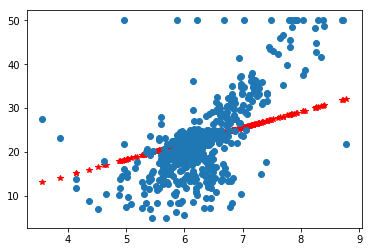

In [52]:
plt.plot(X, previsoes, '*', color='red')
plt.plot(X, y, 'o')

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
mean_squared_error(y, previsoes)

58.52960740731389

# Usando o preço de casas

Dessa vez, vamos utilizar mais colunas

In [55]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)[['RM']]
y = pd.DataFrame(boston.target, columns=['price'])

In [56]:
np.random.seed(1)
_b0, _b1 = np.random.rand(2)
b0 = tf.Variable(_b0, dtype=tf.float32)
b1 = tf.Variable(_b1, dtype=tf.float32)

In [57]:
batch_size = 40
xph = tf.placeholder(tf.float32, [batch_size, 1])
yph = tf.placeholder(tf.float32, [batch_size, 1])

In [58]:
y_calculado = b0 + b1 * xph

In [59]:
erro = tf.losses.mean_squared_error(yph, y_calculado)
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
treinamento = otimizador.minimize(erro)
init = tf.global_variables_initializer()

In [60]:
epocas = 1000

In [61]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(epocas):
        indices = np.random.randint(len(data), size=batch_size)
        feed = {xph: data.iloc[indices], yph: y.iloc[indices]}
        sess.run(treinamento, feed_dict=feed)
    b0_final, b1_final = sess.run([b0, b1])

In [62]:
predicted = b0_final + b1_final*data
predicted

,RM
0,23.634419
1,23.080793
2,25.827355
3,25.155094
4,25.690746
5,23.113148
6,21.610448
7,22.185644
8,20.240762
9,21.581688


# High-Level API

In [63]:
data = boston.data[:, 5:6]
y = boston.target

In [64]:
#Definição das features
colunas = [tf.feature_column.numeric_column('x')]
colunas

[_NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [65]:
regressor = tf.estimator.LinearRegressor(feature_columns=colunas)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_test, y_train, y_test = train_test_split(data, y)

In [68]:
treinamento = tf.estimator.inputs.numpy_input_fn(
    {'x' : x_train},
    y_train,
    batch_size=40,
    num_epochs = None,
    shuffle = False)


teste = tf.estimator.inputs.numpy_input_fn(
    {'x' : x_test},
    y_test,
    batch_size=40,
    num_epochs = 1000,
    shuffle = False)

In [69]:
# trainando o modelo
regressor.train(input_fn=treinamento, steps = 10000)

In [70]:
metricas = regressor.evaluate(input_fn=teste, steps=10000)

In [71]:
metricas

{'average_loss': 66.60314,
 'global_step': 10000,
 'label/mean': 23.074104,
 'loss': 2664.1257,
 'prediction/mean': 22.368269}

In [72]:
previsao = tf.estimator.inputs.pandas_input_fn(x_test, shuffle=False)
previsoes = regressor.predict(previsoes)

In [74]:
previsoes

<generator object Estimator.predict at 0x7f9124351990>